In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # this is for visualization
import seaborn as sns # for visualization
%matplotlib inline
import statsmodels.formula.api as sm
import scipy, scipy.stats
import math # log function is inside this library
from pandas import Series, DataFrame
from collections import Counter

In [337]:
df1 = pd.read_csv("test.csv")
df2 = pd.read_csv("Titanic_survival.csv")

In [338]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [339]:
df2.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [340]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [341]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.6 KB


In [342]:
frames = [df1,df2]

In [343]:
df = pd.concat(frames,axis=1,sort=True)

In [344]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,896,1


In [345]:
df.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerId,Survived
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1305,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1306,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1307,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1308,0
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,1309,0


In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 45.7+ KB


In [347]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
PassengerId      0
Survived         0
dtype: int64

In [348]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,PassengerId,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,1100.500000,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,120.810458,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,892.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,996.250000,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,1100.500000,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1204.750000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1309.000000,1.000000


In [349]:
df_1 = DataFrame(df.dtypes)
df_1

,0
PassengerId,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [350]:
# identify missing values of the 11 columns,add the stats to the datadict
df_1['MissingVal'] = df.isnull().sum()
df_1

,0,MissingVal
PassengerId,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,86
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,1
Cabin,object,327


# Ques1. The survival Rate?

In [351]:
df.Survived.value_counts(normalize=True)

0    0.636364
1    0.363636
Name: Survived, dtype: float64

Only 36% of the passengers survived, where majority of the 63% of the passengers didn't survive in the disaster.

# Ques2. What kind of passengers didn't Survive?

In [352]:
df_resetindex=df.set_index('PassengerId')

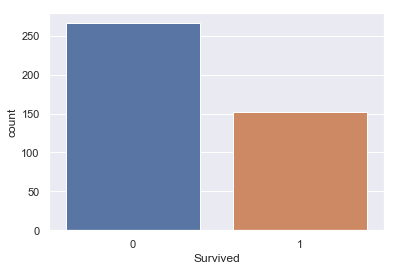

In [353]:
sns.countplot('Survived',data=df_resetindex)
plt.show()

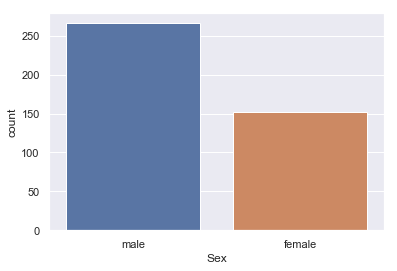

In [354]:
sns.countplot('Sex',data=df_resetindex)
plt.show()

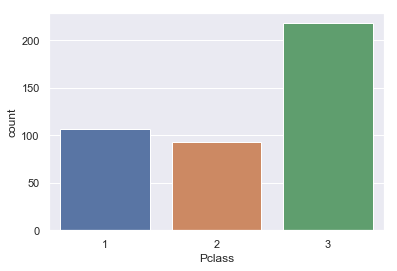

In [355]:
sns.countplot('Pclass',data=df_resetindex)
plt.show()

In [356]:
df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  1           152
male    0           266
Name: Survived, dtype: int64

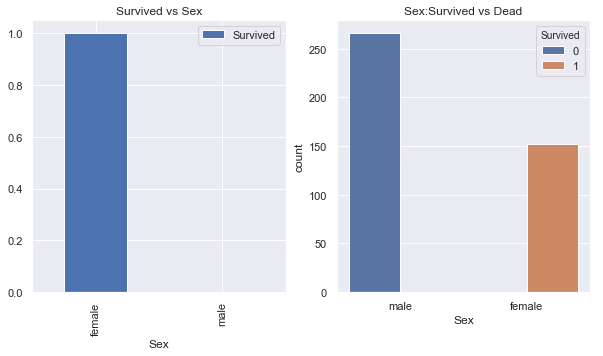

In [357]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df_resetindex[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex',hue='Survived',data=df_resetindex,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

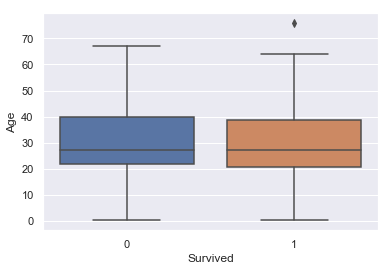

In [358]:
sns.boxplot(x="Survived", y="Age", data=df_resetindex)
plt.show()

From the above three graphs, we can infer that female has better survival rate & chances of survival. There is also a clear relationship between the Pclass and Survival rate. Pclass1 has the better survival rate whereas Pclass3 has the worst survival rate. 

Also, From the box-plot we can see maximum people who survived are between the Age 20 to 40

# Ques3. Show us the EDA that can best explain the fate of a passenger and show us which variables are significant in explaing this? 

In [359]:
df.isnull().sum() #Null Values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
PassengerId      0
Survived         0
dtype: int64

In [360]:
df.Fare.mean()

35.627188489208635

First Remove the Null values

In [361]:
df_final=df.drop(['Cabin'], axis=1) #We will drop the cabin as it is of no use

In [362]:
df_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,892,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,893,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,894,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,895,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,896,1


In [363]:
df_final.isnull().sum() #Here Fare and Age has Null Values respectively

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
PassengerId     0
Survived        0
dtype: int64

In [364]:
df_final.Fare.mean()

35.627188489208635

In [365]:
df_final.Fare.fillna(df_final.Fare.mean(),inplace=True)

In [366]:
df_final.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
PassengerId     0
Survived        0
dtype: int64

In [367]:
df_final.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [368]:
df_final['Title'] = df_final.Name.apply(lambda Name: Name.split(',')[1].split('.')[0].strip())
df_final.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PassengerId,Survived,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,892,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,893,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,894,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,895,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,896,1,Mrs


In [369]:
df_final.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [370]:
Title_Age = df_final.groupby(df_final['Title']).Age.transform('median')
df_final.Age.fillna(Title_Age,inplace=True)

In [371]:
df_final.drop('Name',axis=1,inplace=True)
df_final.drop('Ticket',axis=1,inplace=True)
df_final.drop('Title',axis=1,inplace=True)

In [372]:
df_final.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,PassengerId,Survived
0,892,3,male,34.5,0,0,7.8292,Q,892,0
1,893,3,female,47.0,1,0,7.0000,S,893,1
2,894,2,male,62.0,0,0,9.6875,Q,894,0
3,895,3,male,27.0,0,0,8.6625,S,895,0
4,896,3,female,22.0,1,1,12.2875,S,896,1


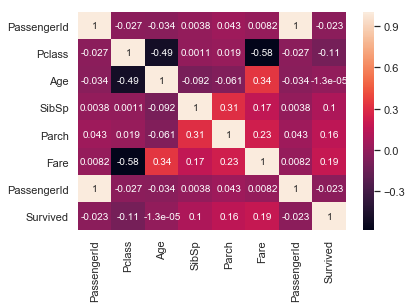

In [373]:
import seaborn as sns
sns.heatmap(df_final.corr(),annot=True)
plt.show()

In [374]:
print("Skewness: %f" % df_final['Fare'].skew())

Skewness: 3.687213


In [375]:
print("Kurtosis: %f" % df_final['Fare'].kurt())

Kurtosis: 17.921595


In [376]:
print('Oldest Passenger was of:',df_final['Age'].max(),'Years')
print('Youngest Passenger was of:',df_final['Age'].min(),'Years')
print('Average Age on the ship:',df_final['Age'].mean(),'Years')

Oldest Passenger was of: 76.0 Years
Youngest Passenger was of: 0.17 Years
Average Age on the ship: 30.272590361445783 Years


Age is one of the significant variables which decides the chances of survival

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


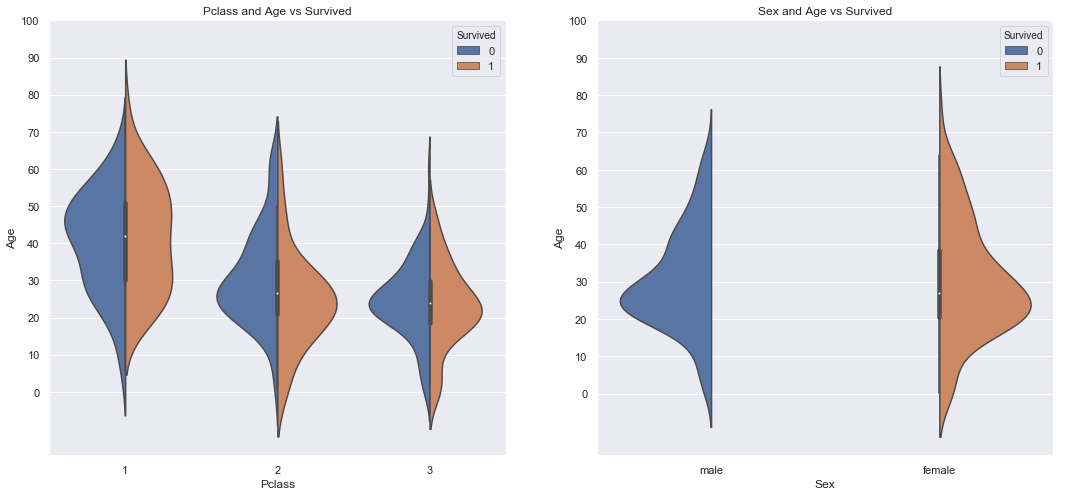

In [377]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=df_resetindex,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=df_resetindex,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

# Observations: 

1. The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks better.
2. Survival chances for Passenegers aged 20-50 from Pclass1 is high andbetter for Women.
3. For males, the survival chances are very very less as seen from second graph.

In [378]:
pd.crosstab([df_resetindex.Embarked,df_resetindex.Pclass],[df_resetindex.Sex,df_resetindex.Survived],margins=True).style.background_gradient(cmap='summer_r')

C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\aujas\AppData\Local\Programs\Python\Python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


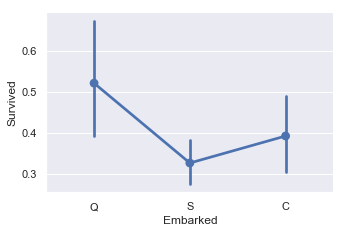

In [379]:
sns.factorplot('Embarked','Survived',data=df_resetindex)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The Chances of survival from Port Q is highest.

In [380]:
ser1=Series({'a':1,'b':2,'c':3})


In [381]:
ser1


a    1
b    2
c    3
dtype: int64

In [382]:
ser1=Series([1,2,3])


In [383]:
ser1

0    1
1    2
2    3
dtype: int64

In [384]:
ser1=Series([1,2,3], index=['a','b','c'])


In [385]:
ser1

a    1
b    2
c    3
dtype: int64